In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [10]:
df_train = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/data/train.csv")

In [11]:
df_train.head()

,comment,facility,lecturer,others,training_program
0,slide giáo trình đầy đủ .,0,0,0,3
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",0,3,0,0
2,đi học đầy đủ full điểm chuyên cần .,0,0,0,1
3,chưa áp dụng công nghệ thông tin và các thiết ...,0,1,0,0
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",0,3,0,0


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11426 entries, 0 to 11425
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   comment           11426 non-null  object
 1   facility          11426 non-null  int64 
 2   lecturer          11426 non-null  int64 
 3   others            11426 non-null  int64 
 4   training_program  11426 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 446.5+ KB


In [13]:
df_train.columns[1:]

Index(['facility', 'lecturer', 'others', 'training_program'], dtype='object')

## **Train - Lables**

In [14]:
# Map sentiment numbers to names
sentiment_mapping = {1: 'Negative', 2: 'Neutral', 3: 'Positive'}

# Prepare the output DataFrame
output = {
    'Aspect': [],
    'Positive': [],
    'Negative': [],
    'Neutral': []
}

# Populate the output data
for column in df_train.columns[1:]:
    # Get counts of non-zero sentiments
    sentiment_counts = df_train[column][df_train[column] != 0].replace(sentiment_mapping).value_counts()
    # Fill in the data for the output
    output['Aspect'].append(column)
    output['Positive'].append(sentiment_counts.get('Positive', 0))
    output['Negative'].append(sentiment_counts.get('Negative', 0))
    output['Neutral'].append(sentiment_counts.get('Neutral', 0))

# Convert to DataFrame
df_check_label_train = pd.DataFrame(output)
df_check_label_train['Total-x'] = df_check_label_train[['Positive', 'Negative', 'Neutral']].sum(axis=1)

# Display the DataFrame
df_check_label_train

,Aspect,Positive,Negative,Neutral,Total-x
0,facility,13,474,10,497
1,lecturer,5071,2909,186,8166
2,others,175,226,161,562
3,training_program,384,1716,101,2201


In [15]:
totals_train = df_check_label_train[['Positive', 'Negative', 'Neutral','Total-x']].sum()

totals_row = pd.DataFrame([['Total-y', *totals_train]], columns=df_check_label_train.columns)

df_check_label_train = pd.concat([df_check_label_train, totals_row], ignore_index=True)

print(df_check_label_train)

             Aspect  Positive  Negative  Neutral  Total-x
0          facility        13       474       10      497
1          lecturer      5071      2909      186     8166
2            others       175       226      161      562
3  training_program       384      1716      101     2201
4           Total-y      5643      5325      458    11426


In [16]:
df_train_plot = df_check_label_train[:-1]
df_train_plot_sorted = df_train_plot.sort_values(by='Total-x', ascending= False)
df_train_plot_sorted

,Aspect,Positive,Negative,Neutral,Total-x
1,lecturer,5071,2909,186,8166
3,training_program,384,1716,101,2201
2,others,175,226,161,562
0,facility,13,474,10,497


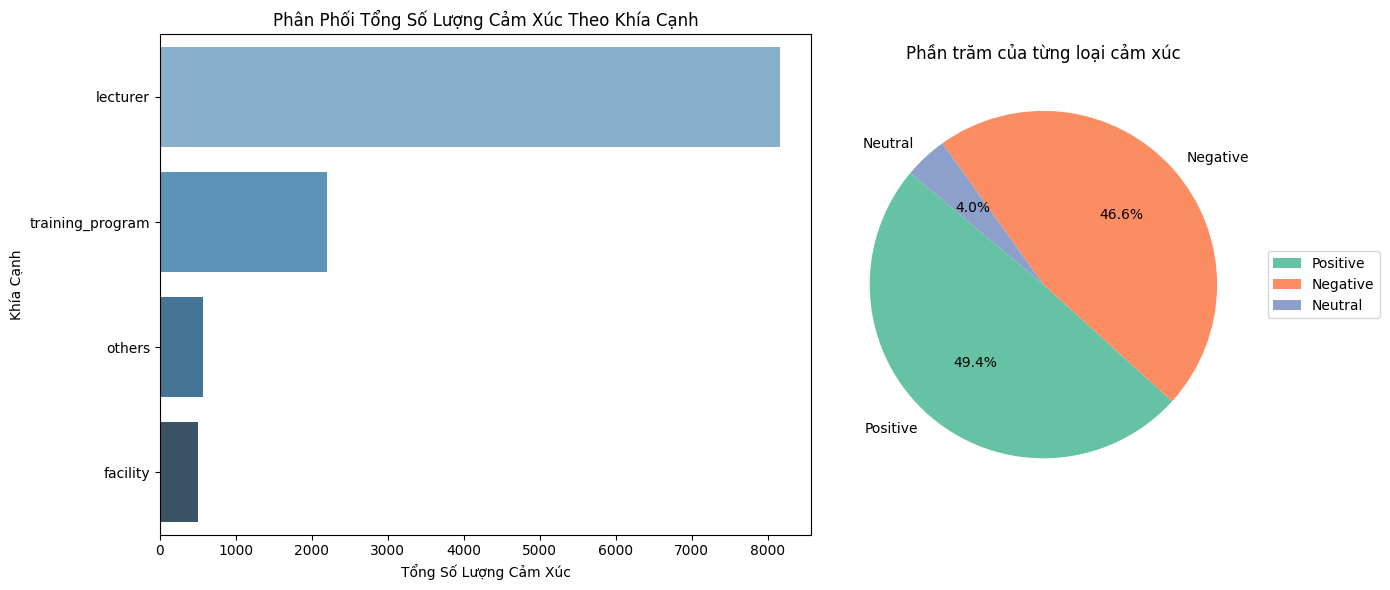

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo figure và axes cho subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [6, 4]})

# Biểu đồ cột
sns.barplot(x='Total-x', y='Aspect', data=df_train_plot_sorted, palette='Blues_d', ax=axs[0])
axs[0].set_title('Phân Phối Tổng Số Lượng Cảm Xúc Theo Khía Cạnh')
axs[0].set_xlabel('Tổng Số Lượng Cảm Xúc')
axs[0].set_ylabel('Khía Cạnh')
sizes = [5643,5325,458]

# Biểu đồ tròn
colors = sns.color_palette('Set2')
axs[1].pie(sizes, labels=['Positive','Negative','Neutral'], autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title('Phần trăm của từng loại cảm xúc')
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


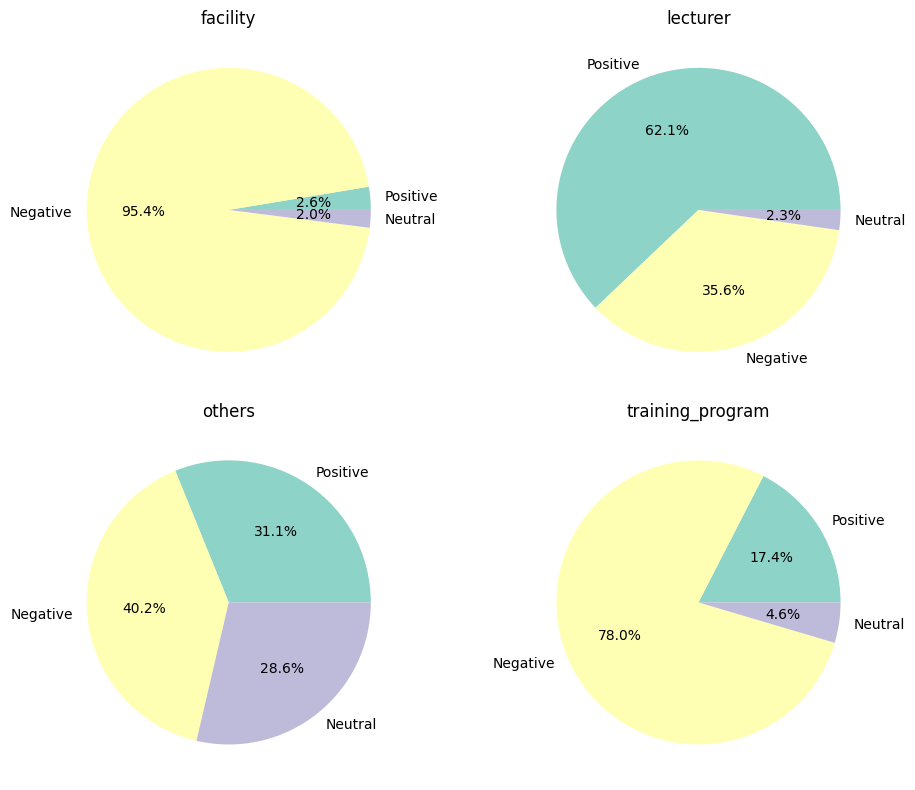

In [18]:
# Define colors for sentiments
colors = sns.color_palette('Set3')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten axes array to simplify indexing
axes = axes.flatten()

# Iterate over each aspect and create a pie chart
for i, aspect in enumerate(df_train_plot['Aspect']):
    positive = df_train_plot['Positive'][i]
    negative = df_train_plot['Negative'][i]
    neutral = df_train_plot['Neutral'][i]

    # Plot a pie chart for the current aspect
    axes[i].pie([positive, negative, neutral], labels=['Positive', 'Negative', 'Neutral'], autopct='%1.1f%%', colors=colors)
    axes[i].set_title(f'{aspect}')

# Hide empty subplots
for i in range(len(df_train_plot['Aspect']), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### **Labels Review**

#### **Khía cạnh**

+ Có tổng cộng 4 khía cạnh được trích xuất 
+ Khía cạnh có tần suất xuất hiện nhiều nhất là lecturer

+ Khía cạnh có tần suất xuất hiện ít nhất là facility

#### **Cảm xúc**

+ Có tổng cộng 3 loại cảm xúc: Tích cực, tiêu cực và bình thường.

+ Cảm xúc neutral xuất hiện với số lượng vô cùng nhỏ có thể ảnh hưởng đến kết quả của mô hình

**=>Trong trường hợp mô hình hoạt động không tốt với những khía cạnh và nhãn có tần suất xuất hiện ít, cần thực hiện data augmentation**



## **EDA TEXT**

In [19]:
# Hàm để tách và tính kích thước từ vựng
def get_vocab_size(series):
    # Tách tất cả các từ trong series và chuyển đổi thành một list duy nhất
    all_words = series.str.split(expand=True).stack().unique()
    # Đếm số lượng từ duy nhất
    vocab_size = len(all_words)
    return vocab_size

In [20]:
df_test = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/data/test.csv")
df_val = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/data/val.csv")

In [21]:
df_train['word_count'] = df_train['comment'].apply(lambda x: len(x.split()))
df_test['word_count'] = df_test['comment'].apply(lambda x: len(x.split()))
df_val['word_count'] = df_val['comment'].apply(lambda x: len(x.split()))

average_words_train = df_train['word_count'].mean()
average_words_test = df_test['word_count'].mean()
average_words_val = df_val['word_count'].mean()

In [22]:
print(f"Số từ trung bình trong mỗi câu review là: {average_words_train}")
print(f"Số từ trung bình trong mỗi câu review tập test là: {average_words_test}")
print(f"Số từ trung bình trong mỗi câu review tập val là: {average_words_val}")

Số từ trung bình trong mỗi câu review là: 14.308769473131454
Số từ trung bình trong mỗi câu review tập test là: 14.2207833228048
Số từ trung bình trong mỗi câu review tập val là: 13.67150979153506


In [23]:
vocab_size_train = get_vocab_size(df_train['comment'])
vocab_size_test = get_vocab_size(df_test['comment'])
vocab_size_val = get_vocab_size(df_val['comment'])

In [24]:
print(f'Vocab size train: {vocab_size_train}')
print(f'Vocab size val: {vocab_size_val}')
print(f'Vocab size test: {vocab_size_test}')

Vocab size train: 2514
Vocab size val: 1157
Vocab size test: 1581


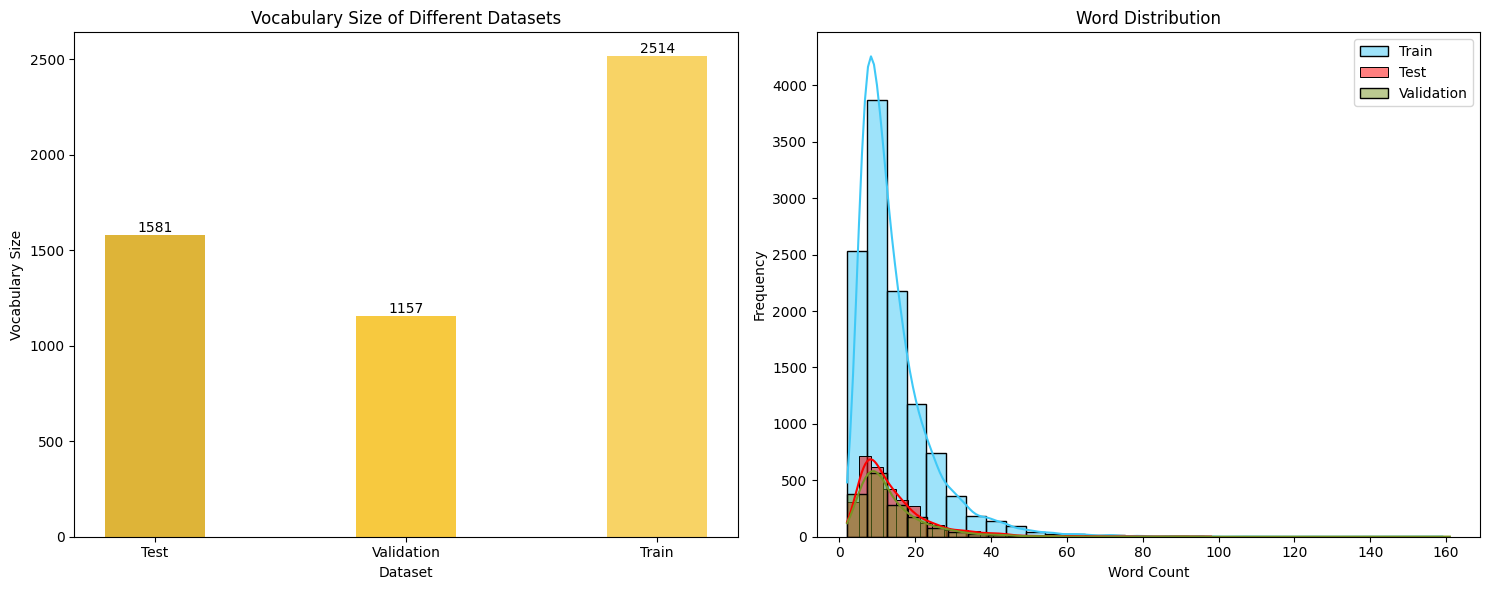

In [25]:
# Danh sách các tên của bộ dữ liệu và giá trị của vocab size
datasets = ['Test', 'Validation', 'Train']
vocab_sizes = [vocab_size_test, vocab_size_val, vocab_size_train]

# Tạo figure và axes cho subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
for i, (dataset, size) in enumerate(zip(datasets, vocab_sizes)):
    axs[0].text(i, size, str(size), ha='center', va='bottom')
# Biểu đồ cột ngang
axs[0].bar(datasets, vocab_sizes, color=['#deb438', '#f7c93f', '#f8d365'], width=0.4)
axs[0].set_xlabel('Dataset')
axs[0].set_ylabel('Vocabulary Size')
axs[0].set_title('Vocabulary Size of Different Datasets')

# Biểu đồ histogram
sns.histplot(df_train['word_count'], color="#3fc9f7", label="Train", bins=30, kde=True, ax=axs[1])
sns.histplot(df_test['word_count'], color="red", label="Test", bins=30, kde=True, ax=axs[1])
sns.histplot(df_val['word_count'], color="#789425", label="Validation", bins=30, kde=True, ax=axs[1])

axs[1].legend()
axs[1].set_title('Word Distribution')
axs[1].set_xlabel('Word Count')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## **New data**


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("train_cutoff_0.5.csv")

In [45]:
# Function to calculate the maximum word length in a column
def max_word_length(row):
    words = str(row).split()  # Split the string into words
    return max(len(word) for word in words)  # Find the maximum length of words

# Calculate the maximum word length for each row in col1
df['max_word_length'] = df['comment'].apply(max_word_length)
df

,comment,facility,lecturer,others,training_program,max_word_length
0,An ninh đảm bảo,2,0,0,0,4
1,Anh bạn chuyên tâm và học tập rất chăm chỉ.,0,0,2,0,6
2,Anh bạn cùng lớp rất hòa đồng và dễ gần.,0,0,2,0,4
3,Anh bạn của tôi rất năng động và hoạt bát.,0,0,3,0,4
4,Anh bạn học của tôi có khả năng giao tiếp tốt ...,0,0,3,0,6
...,...,...,...,...,...,...
12275,chỉ vì môn game mà em học hai lần mà không qua...,0,0,0,1,6
12276,em cảm ơn cô nhiều .,0,3,0,0,5
12277,"giáo viên dạy dễ hiểu , nhiệt tình .",0,3,0,0,5
12278,"gói gọn doubledot hay , tận tình , phù hợp với...",0,3,0,0,9


In [32]:
# Map sentiment numbers to names
sentiment_mapping = {1: 'Negative', 2: 'Neutral', 3: 'Positive'}

# Prepare the output DataFrame
output = {
    'Aspect': [],
    'Positive': [],
    'Negative': [],
    'Neutral': []
}

# Populate the output data
for column in df.columns[1:]:
    # Get counts of non-zero sentiments
    sentiment_counts = df[column][df[column] != 0].replace(sentiment_mapping).value_counts()
    # Fill in the data for the output
    output['Aspect'].append(column)
    output['Positive'].append(sentiment_counts.get('Positive', 0))
    output['Negative'].append(sentiment_counts.get('Negative', 0))
    output['Neutral'].append(sentiment_counts.get('Neutral', 0))

# Convert to DataFrame
df_check_label_train = pd.DataFrame(output)

# Display the DataFrame
df_check_label_train

,Aspect,Positive,Negative,Neutral
0,facility,861,1323,609
1,lecturer,2528,1462,186
2,others,1024,1076,1010
3,training_program,384,1716,101


In [33]:
df_train_plot = df_check_label_train
df_train_plot

,Aspect,Positive,Negative,Neutral
0,facility,861,1323,609
1,lecturer,2528,1462,186
2,others,1024,1076,1010
3,training_program,384,1716,101


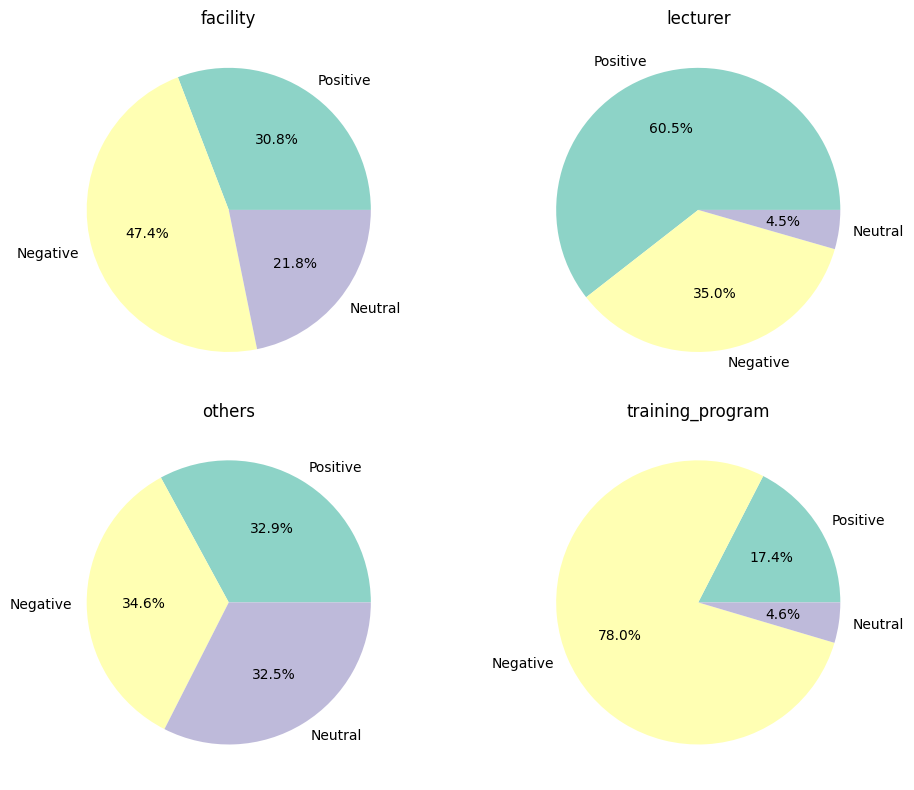

In [34]:
# Define colors for sentiments
colors = sns.color_palette('Set3')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten axes array to simplify indexing
axes = axes.flatten()

# Iterate over each aspect and create a pie chart
for i, aspect in enumerate(df_train_plot['Aspect']):
    positive = df_train_plot['Positive'][i]
    negative = df_train_plot['Negative'][i]
    neutral = df_train_plot['Neutral'][i]

    # Plot a pie chart for the current aspect
    axes[i].pie([positive, negative, neutral], labels=['Positive', 'Negative', 'Neutral'], autopct='%1.1f%%', colors=colors)
    axes[i].set_title(f'{aspect}')

# Hide empty subplots
for i in range(len(df_train_plot['Aspect']), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()